# Factors affecting Economic Growth in Developing Countries

In [68]:
# changing base year of aid to 2015

In [86]:
# importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [70]:
# reading the data
cols = ['year', 'country', 'growth', 'gdp', 'export', 'debt', 'resource', 'aid', 'life', 'invest', 'fdi', 'deflator']
data = pd.read_csv('data/data.csv')
data.columns = cols
data

,year,country,growth,gdp,export,debt,resource,aid,life,invest,fdi,deflator
0,1990,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,50.331,NaN,NaN,NaN
1,1990,Algeria,-1.754076,3123.995683,3.189756e+10,NaN,17.705187,NaN,66.938,NaN,0.000540,30.259599
2,1990,Angola,-6.657467,2998.780751,NaN,NaN,28.958619,NaN,45.306,NaN,-2.979635,14.007440
3,1990,Bangladesh,3.086982,512.096589,1.631244e+09,NaN,0.537215,NaN,58.210,NaN,0.010250,6.532735
4,1990,Belize,9.017296,3147.267760,2.596129e+08,28.129049,0.763750,NaN,71.242,10.979978,4.173882,0.172866
...,...,...,...,...,...,...,...,...,...,...,...,...
487,2015,Vietnam,5.570526,2085.101349,1.734904e+11,NaN,4.206113,NaN,75.110,NaN,6.106361,-0.190788
488,2015,West Bank and Gaza,1.372585,3272.154324,2.244300e+09,NaN,0.000000,NaN,73.442,0.255305,0.751036,-3.707013
489,2015,"Yemen, Rep.",-29.827145,1601.830063,NaN,NaN,2.105149,NaN,66.085,NaN,-0.036388,46.476251
490,2015,Zambia,-0.187950,1338.290927,7.892389e+09,49.407327,11.163582,NaN,61.737,3.090412,7.447417,6.659292


In [71]:
data.isna().sum().sort_values(ascending=False) / len(data) * 100

aid         99.390244
debt        83.739837
invest      66.869919
export      30.691057
fdi          9.552846
gdp          8.943089
deflator     7.926829
growth       7.723577
resource     7.317073
life         0.000000
country      0.000000
year         0.000000
dtype: float64

In [72]:
data.drop(['aid', 'debt', 'invest'], axis=1, inplace=True)
data

,year,country,growth,gdp,export,resource,life,fdi,deflator
0,1990,Afghanistan,NaN,NaN,NaN,NaN,50.331,NaN,NaN
1,1990,Algeria,-1.754076,3123.995683,3.189756e+10,17.705187,66.938,0.000540,30.259599
2,1990,Angola,-6.657467,2998.780751,NaN,28.958619,45.306,-2.979635,14.007440
3,1990,Bangladesh,3.086982,512.096589,1.631244e+09,0.537215,58.210,0.010250,6.532735
4,1990,Belize,9.017296,3147.267760,2.596129e+08,0.763750,71.242,4.173882,0.172866
...,...,...,...,...,...,...,...,...,...
487,2015,Vietnam,5.570526,2085.101349,1.734904e+11,4.206113,75.110,6.106361,-0.190788
488,2015,West Bank and Gaza,1.372585,3272.154324,2.244300e+09,0.000000,73.442,0.751036,-3.707013
489,2015,"Yemen, Rep.",-29.827145,1601.830063,NaN,2.105149,66.085,-0.036388,46.476251
490,2015,Zambia,-0.187950,1338.290927,7.892389e+09,11.163582,61.737,7.447417,6.659292


In [73]:
data.dropna(subset=['growth'], inplace=True)
data.reset_index(inplace=True)
data.drop('index', axis=1, inplace=True)
data

,year,country,growth,gdp,export,resource,life,fdi,deflator
0,1990,Algeria,-1.754076,3123.995683,3.189756e+10,17.705187,66.938,0.000540,30.259599
1,1990,Angola,-6.657467,2998.780751,NaN,28.958619,45.306,-2.979635,14.007440
2,1990,Bangladesh,3.086982,512.096589,1.631244e+09,0.537215,58.210,0.010250,6.532735
3,1990,Belize,9.017296,3147.267760,2.596129e+08,0.763750,71.242,4.173882,0.172866
4,1990,Benin,5.507343,795.071655,6.169462e+08,7.735960,53.812,-0.150760,2.176597
...,...,...,...,...,...,...,...,...,...
449,2015,Vietnam,5.570526,2085.101349,1.734904e+11,4.206113,75.110,6.106361,-0.190788
450,2015,West Bank and Gaza,1.372585,3272.154324,2.244300e+09,0.000000,73.442,0.751036,-3.707013
451,2015,"Yemen, Rep.",-29.827145,1601.830063,NaN,2.105149,66.085,-0.036388,46.476251
452,2015,Zambia,-0.187950,1338.290927,7.892389e+09,11.163582,61.737,7.447417,6.659292


In [74]:
data.isna().sum().sort_values(ascending=False) / len(data) * 100

export      25.330396
fdi          3.524229
gdp          1.982379
resource     1.321586
deflator     0.220264
life         0.000000
growth       0.000000
country      0.000000
year         0.000000
dtype: float64

In [75]:
imp = KNNImputer(n_neighbors=5)
data.iloc[:, 3:] = imp.fit_transform(data.iloc[:, 3:])
data

,year,country,growth,gdp,export,resource,life,fdi,deflator
0,1990,Algeria,-1.754076,3123.995683,3.189756e+10,17.705187,66.938,0.000540,30.259599
1,1990,Angola,-6.657467,2998.780751,1.175058e+11,28.958619,45.306,-2.979635,14.007440
2,1990,Bangladesh,3.086982,512.096589,1.631244e+09,0.537215,58.210,0.010250,6.532735
3,1990,Belize,9.017296,3147.267760,2.596129e+08,0.763750,71.242,4.173882,0.172866
4,1990,Benin,5.507343,795.071655,6.169462e+08,7.735960,53.812,-0.150760,2.176597
...,...,...,...,...,...,...,...,...,...
449,2015,Vietnam,5.570526,2085.101349,1.734904e+11,4.206113,75.110,6.106361,-0.190788
450,2015,West Bank and Gaza,1.372585,3272.154324,2.244300e+09,0.000000,73.442,0.751036,-3.707013
451,2015,"Yemen, Rep.",-29.827145,1601.830063,4.191094e+10,2.105149,66.085,-0.036388,46.476251
452,2015,Zambia,-0.187950,1338.290927,7.892389e+09,11.163582,61.737,7.447417,6.659292


In [77]:
df_dict = {}
for year in range(1990, 2016, 5):
    df_dict[year] = data[data.year == year]

In [78]:
df_dict[1990]

,year,country,growth,gdp,export,resource,life,fdi,deflator
0,1990,Algeria,-1.754076,3123.995683,3.189756e+10,17.705187,66.938,0.000540,30.259599
1,1990,Angola,-6.657467,2998.780751,1.175058e+11,28.958619,45.306,-2.979635,14.007440
2,1990,Bangladesh,3.086982,512.096589,1.631244e+09,0.537215,58.210,0.010250,6.532735
3,1990,Belize,9.017296,3147.267760,2.596129e+08,0.763750,71.242,4.173882,0.172866
4,1990,Benin,5.507343,795.071655,6.169462e+08,7.735960,53.812,-0.150760,2.176597
...,...,...,...,...,...,...,...,...,...
66,1990,Uzbekistan,-1.331990,1467.921251,9.176494e+10,9.938969,66.481,2.073340,3.979689
67,1990,Vanuatu,8.819769,2640.379223,8.025001e+10,0.905462,64.721,7.763654,-0.968104
68,1990,Vietnam,2.877014,541.900375,4.354755e+09,11.518886,70.551,2.781323,42.095098
69,1990,Zambia,-3.163812,851.184841,5.428570e+10,20.981825,49.249,6.170064,106.388920


In [81]:
# for year in range(1990, 2016, 5):
#     print(f'Year: {year}')
#     print(df_dict[year].isna().sum().sort_values(ascending=False))
#     print()

In [94]:
for year in range(1990, 2016, 5):
    scaler = StandardScaler()
    df_dict[year].iloc[:, 2:] = scaler.fit_transform(df_dict[year].iloc[:, 2:])

/home/yashbg/miniconda3/envs/rasa/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/yashbg/miniconda3/envs/rasa/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/yashbg/miniconda3/envs/rasa/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [128]:
lr_dict = {}
X_dict = {}
y_dict = {}
for year in range(1990, 2016, 5):
    X_dict[year] = df_dict[year].drop(['year', 'country', 'growth', 'deflator'], axis=1)
    y_dict[year] = df_dict[year].growth
    lr_dict[year] = LinearRegression().fit(X_dict[year], y_dict[year])
    print(f'Year {year}: {lr_dict[year].score(X_dict[year], y_dict[year])} ')

Year 1990: 0.09222281341066108 
Year 1995: 0.044699723800550095 
Year 2000: 0.16576710085424884 
Year 2005: 0.1386886506290319 
Year 2010: 0.06917568476714364 
Year 2015: 0.0494919517588952 


In [129]:
for year in range(1990, 2016, 5):
    print(f'Year {year}: coef: {lr_dict[year].coef_} intercept: {lr_dict[year].intercept_}')

Year 1990: coef: [-0.08370622 -0.08081019  0.06978284  0.30705136  0.09774508] intercept: -1.502253052031049e-16
Year 1995: coef: [ 0.12166271 -0.01983644 -0.07952231 -0.2923698   0.00775054] intercept: -8.439385445560911e-17
Year 2000: coef: [-0.03618852  0.24390176  0.03884082  0.34366529  0.11191125] intercept: -6.106567561566461e-17
Year 2005: coef: [-0.09381817  0.23865282  0.21001673  0.23517943  0.00124439] intercept: -5.297645537935546e-17
Year 2010: coef: [-0.15422639  0.1726359   0.14521424 -0.0146353  -0.04424017] intercept: -1.883487593622738e-17
Year 2015: coef: [-0.10670889  0.05246991 -0.06271737  0.2304539  -0.00328465] intercept: -3.134739147748706e-16


In [115]:
X = df_dict[2005].drop(['year', 'country', 'growth', 'deflator'], axis=1)
y = df_dict[2005].growth
y_pred = lr_dict[2005].predict(X)

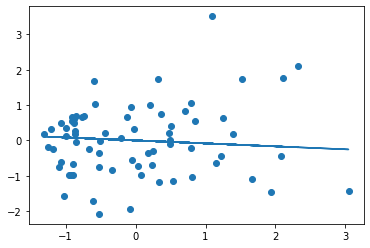

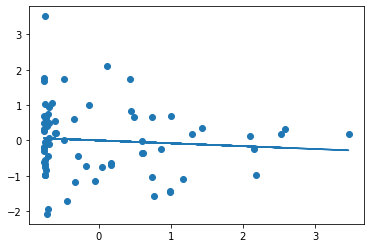

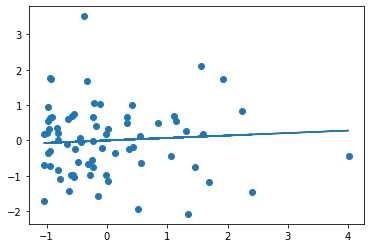

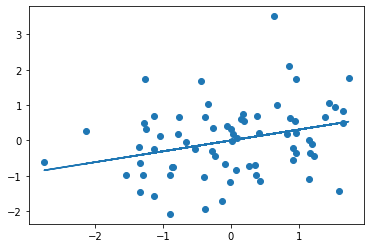

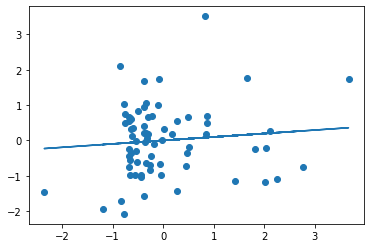

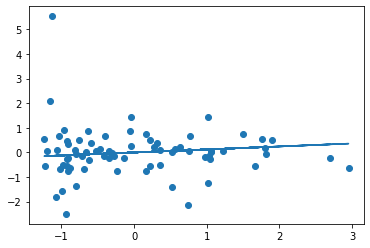

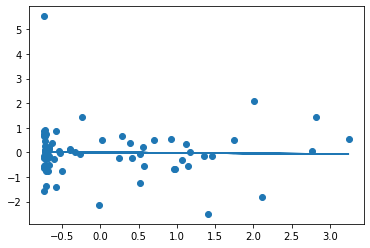

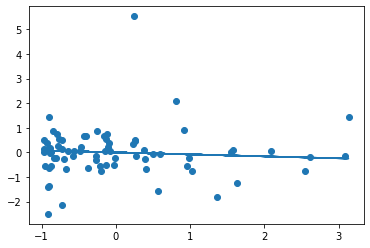

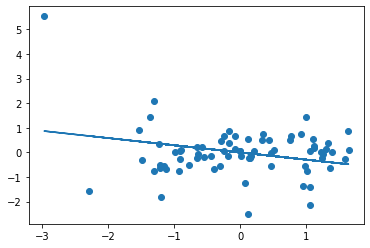

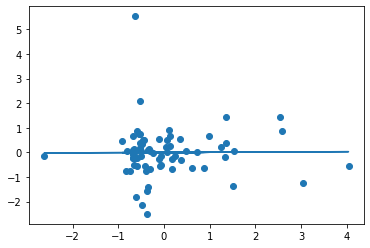

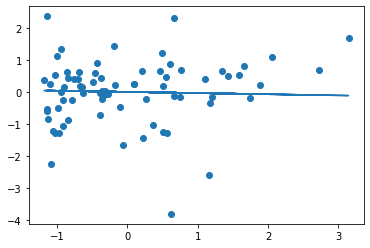

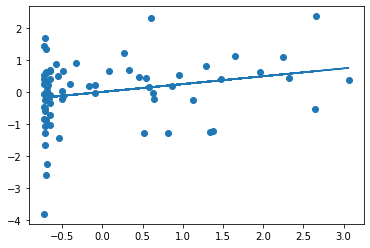

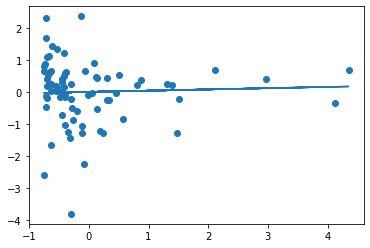

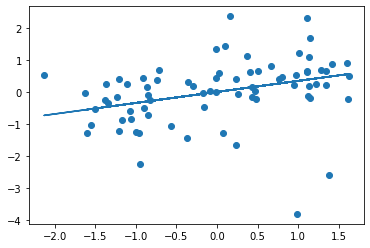

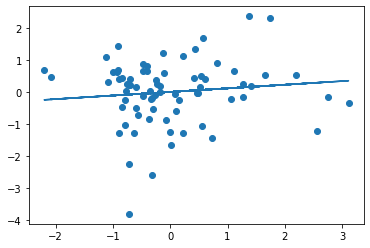

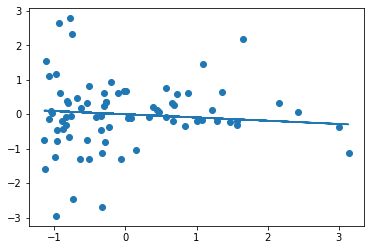

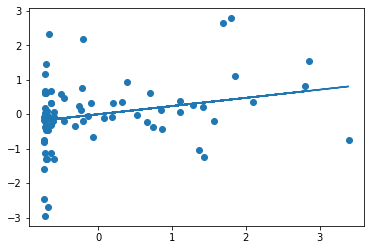

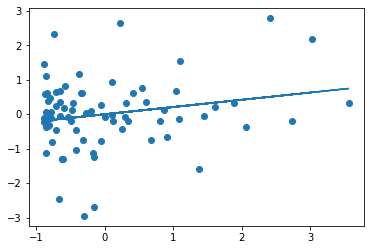

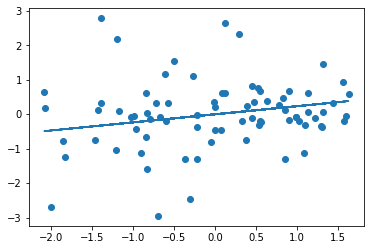

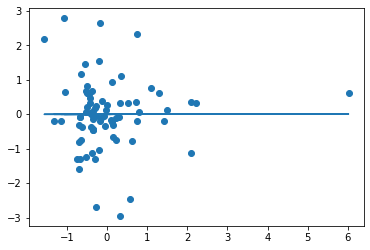

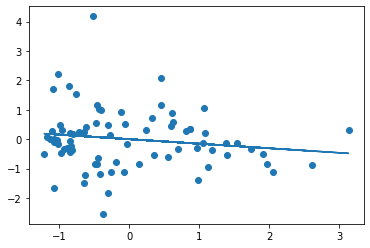

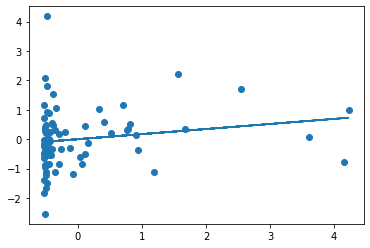

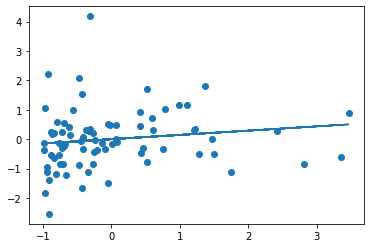

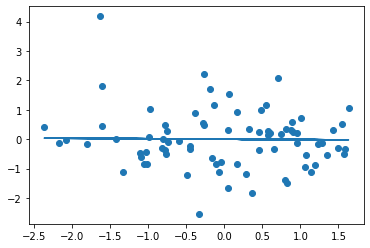

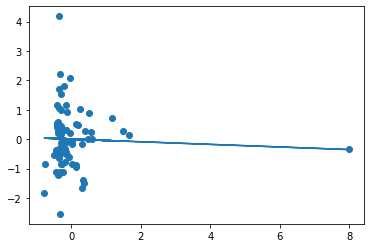

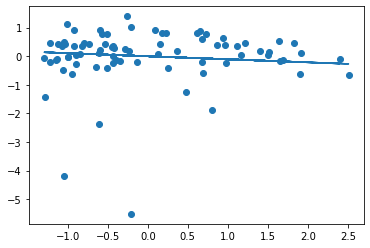

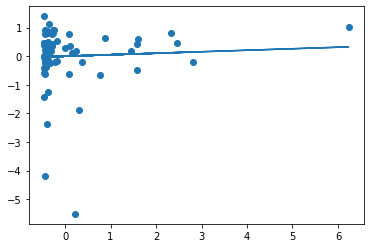

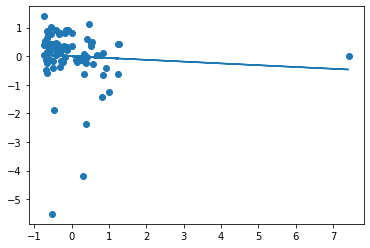

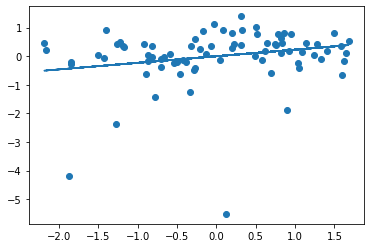

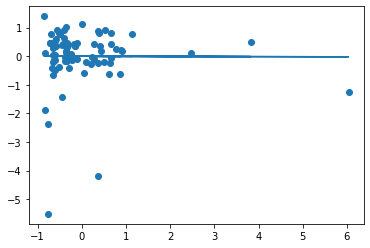

In [131]:
for year in range(1990, 2016, 5):
    for i, col in enumerate(data.columns[3:-1]):
        plt.scatter(X_dict[year][col], y_dict[year])
        y_pred = lr_dict[year].coef_[i] * X_dict[year][col] + lr_dict[year].intercept_
        plt.plot(X_dict[year][col], y_pred)
        plt.show()